In [5]:

## Classification.Trong bài này chúng ta sẽ áp dụng hai mô hình này cho bài toán Classification và dimensional Reduction 
##trên tập dữ liệu "WINE".
##Trước khi bắt đầu chúng ta review lại các bước thông thường cho một bài toán machine learning .
##

1. Thu thập dữ liệu(Data collection),preprocessing(tiền xử lý dữ liệu),khai phá dữ liệu (exploration).
    - Chia dữ liệu thành 2 phần data training và data testing
2. Phát triển mô hình ( Development model)
   - Giả sử mô hình $f$ là mô hình chúng ta cần predict từ mô hình gốc là $F$ . Model  $f$ có tham số là $w$.
   - Định nghĩa $C(w)$ là hàm cost function đo lường "how good a particular $f$ can explain the training data".
       Cost function càng nhỏ càng tốt
3. Training : Sử dụng các Algorithm để tìm các tham số w sao cho cost function nhỏ nhất 
4. Testing : Đánh giá lại thuật toán trên dữ liệu testing.
5. Ứng dụng model vào thực tế

## Preparing data :
Chuẩn bị dữ liệu training và testing

In [3]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from IPython.display import display

In [4]:
# download dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header=None)
# Set column name of dataset
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
# Xem thử 5 instance đầu tiên
display(df.head())
# split feature and target 
X = df.drop("Class label",axis=1) # axis = 1 có nghĩa drop veriticle(trục tung)
y = df["Class label"]
# sử dụng train_test_split chia dữ liệu theo tỉ lệ 7:3 train và test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =0)
print("Number of training sample :",X_train.shape[0])
print("Number of testing sample :",X_test.shape[0])
print("Class lable :",y.unique())

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Number of training sample : 124
Number of testing sample : 54
Class lable : [1 2 3]


## Training
Đầu tiên chúng ta sẽ sử dụng Decision tree để classifier trên tập dữ liệu sử dụng API của sklearn.

In [5]:
from sklearn.tree import DecisionTreeClassifier
# Các tham số cần chú ý
# Criterion # impurity function (Function để xác định feature nào dùng để chia tree, ex : entropy,Gini..)
# Max_depth : Max depth of tree (Số nhánh tree tối đa để tránh overfiting)
# Random_state : seed of random number generator ( tái sử dụng)
tree = DecisionTreeClassifier(criterion ="entropy",max_depth = 3,random_state = 0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [18]:
# Lưu ý rằng : Thông thường đối với các thuật toán khác chúng ta thường standardize trước khi training để thuật toán hội tụ nhanh
# hơn . Nhưng đối với decission tree và random forest thì không cần thiết bởi vì các hàm "impurity function" nó sẽ không thay đổi
# kết quả khi chọn feature

## Testing
Sau khi xây dựng xong model chúng ta test lại kết quả classifier

In [6]:
y_pre = tree.predict(X_test)
print("Misclassifier samples :",sum((y_test!=y_pre)))
print("Accuracy of tree :",round(sum((y_test==y_pre))/y_test.shape[0],3))

Misclassifier samples : 2
Accuracy of tree : 0.963


In [7]:
# Cách khác nhanh hơn dùng API sklearn
from sklearn.metrics import accuracy_score
print("Accuracy of tree :",accuracy_score(y_test,y_pre))

Accuracy of tree : 0.962962962963


## Visualization
Decission trees là một model tương đối là dễ xây dựng và dễ giải thích . Bằng cách "Visualization tree" chúng ta dễ dàng 
giải thích được thuật toán nó classifier bằng các feature nào.
Sử dụng graphviz để visualization tree (install : pip install graphviz )

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot",feature_names=X.columns.values)

In [78]:
# Sau đó chuyển File "tree.dot" sang file fig-tree.png bằng lệnh " dot Tpng tree.dot -o fig-tree.png

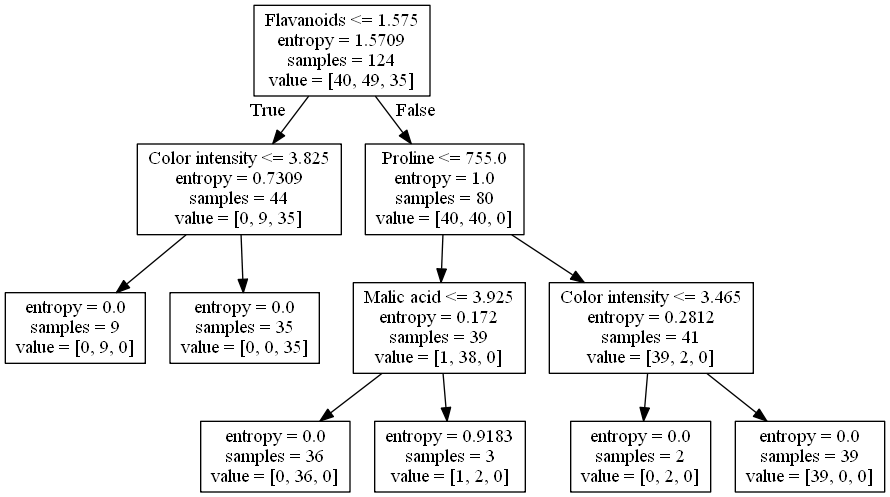

In [9]:
from IPython.display import Image
Image("fig-tree.png")

## Random Forest
Random forest là một trong những model đạt được những thành tựu lớn trong thập kỉ vừa qua. Một cách trực quan thì random forest được tạo ra từ những model decission tree(forest ở đây nghĩa là được tạo ra bởi nhiều tree).Thuật ngữ chuyên môn gọi đây là phương pháp ensemble method. Ý tưởng đằng sau ensemble method là kết hợp những thuật toán yếu thành thuật toán có độ chính xác cao hơn.Thuật toán random forest có thể tóm tắt qua các bước sau đây :
1. Random M bootstrap sample từ training data (with replacement)
2. Phát triển decission tree từ bootstrap sample .Tại mỗi node :
    - Random k feature without replacement
    - Chia mỗi node bằng cách chọn feature maximun entropy.
3. Lặp lại T lần bước 1 và 2 được T tree .
4. Predict bằng hình thức đa số thắng thiểu số

Để giải thích model random forest thì ta cũng làm tương tự như decision tree tuy có đôi chút sự khác biệt. Nhưng một ưu điểm lớn
mà ta thấy ở random forest là ta không cần quan tâm nhiều về depth tree như ở decission tree.Vì khi ta predict model thì dự trên đa số thằng thiểu số(voted) nên có thể tránh được noise từ 1 tree đơn lẻ.Vì thế ta không cần prune tree(cắt tỉa tree). Tham số chúng ta cần quan tâm là T (số lượng cây) ở bước 3. T càng lớn thì model thể hiện càng tốt nhưng bù lại chi phí tính toán lại cao.

### Training
Chúng ta training random forest từ hàm RandomForestClassifier trong sklearn

In [10]:
from sklearn.ensemble import RandomForestClassifier
# criterion # impurity function
# n_estimators : number of decission tree
# random_state :seed used by random number generator
#n_jobs : number of cores for parallelims

forest = RandomForestClassifier(criterion="entropy",n_estimators=200,random_state= 1,n_jobs= 2)
forest.fit(X_train,y_train)
y_predict = forest.predict(X_test)
print("Accuracy of random foreset :",accuracy_score(y_test,y_predict))

Accuracy of random foreset : 0.981481481481


In [85]:
# Accuracy = 98% so với decision tree là 96%.
# Lưu ý : trong RandomForestClassifier thì M bootstrap sample mặc định sẽ bằng với N sample ở dữ liệu training.Còn K feature thì
# mặc định sẽ là K =  sqrt{D} với D là số lượng feature

# Computing feature importance
Ngoài classifier random forest còn sử dụng để tính toán feature importance . Sử dụng random forest người ta có thể đo lường 
feature importance bằng cách average information gain (impurity descrease) từ decision tree.

1 Flavanoids : 0.189
2 OD280/OD315 of diluted wines : 0.162
3 Proline : 0.158
4 Color intensity : 0.155
5 Alcohol : 0.102
6 Hue : 0.065
7 Total phenols : 0.05
8 Alcalinity of ash : 0.03
9 Proanthocyanins : 0.023
10 Malic acid : 0.022
11 Magnesium : 0.019
12 Nonflavanoid phenols : 0.013
13 Ash : 0.011


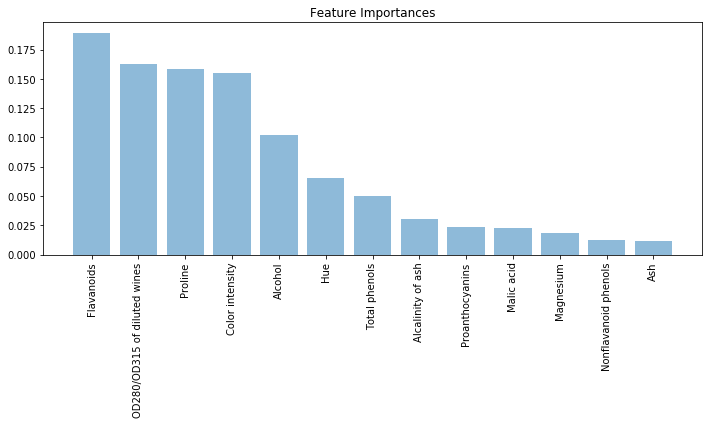

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
importances = forest.feature_importances_
# sắp xếp index theo thứ tự giảm dần
indices = np.argsort(importances)[::-1]
for i in range(X_train.shape[1]):
    print(i+1,X.columns.values[indices[i]],":",round(importances[indices[i]],3))
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]),importances[indices],align ="center",alpha=0.5)
plt.xticks(range(X_train.shape[1]),X_train.columns.values[indices],rotation=90)
plt.tight_layout()
plt.savefig("feature_Importance.png",dpi=300)

In [ ]:
# Như hình trên ta thấy rằng các feature importance trong việc classifier cho "wine" data set là "Flavanoids","OD280/OD315 
#of diluted wines,'Proline', và 'Color intensity'. Lưu ý rằng cac feature importance này có thể thay đổi khi chúng ta
# thay đổi T(number of tree)

#  Feature Selection
Bằng cách phớt lờ các feature unimportance, chúng ta sẽ giảm chiều dữ liệu và compress(nén dữ liệu) lại. Ví dụ ta sẽ giữa lại
2 feature quan trọng nhất là Flavanoids","OD280/OD315 of diluted wines"

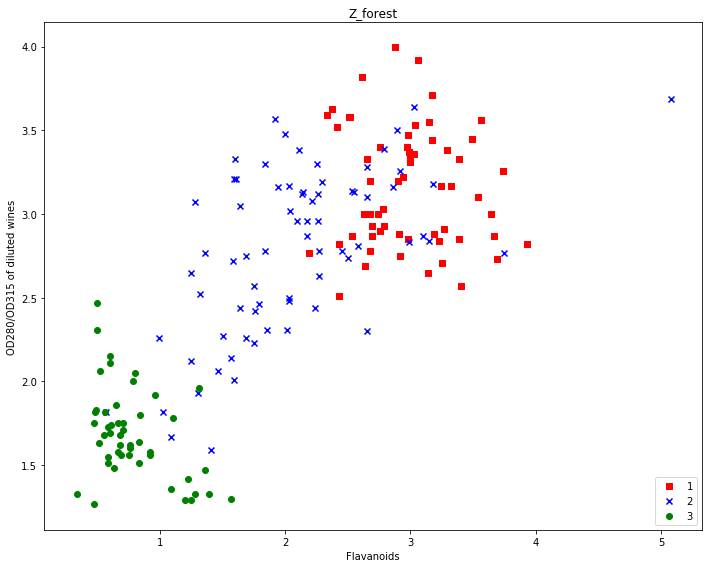

In [62]:
Z_forest = X[["Flavanoids","OD280/OD315 of diluted wines"]].values
color = ["r","b","g"]
marker = ["s","x","o"]
plt.figure(figsize=(10,8))
for i,j,k in zip(y.unique(),color,maker):
    plt.scatter([Z_forest[y.values==i,0]],
               [Z_forest[y.values==i,1]],c=j,marker=k)
plt.title("Z_forest")
plt.xlabel("Flavanoids")
plt.ylabel("OD280/OD315 of diluted wines")
plt.legend([1,2,3],loc=4)
plt.tight_layout()
plt.savefig("feature_selection.png",dpi=300)

In [63]:
# Trong sklearn chúng ta có thể sử dụng hàm SelectFromModel để chọn ra các feature quan trọng .

In [68]:
from sklearn.feature_selection import SelectFromModel
feature = SelectFromModel(forest,threshold=0.16)
feature.fit(X_train,y_train)
Z_forest_sk = feature.transform(X)
for i in range(Z_forest_sk.shape[1]):
    print(i+1,X.columns.values[indices[i]],":",importances[indices[i]])

1 Flavanoids : 0.188735603316
2 OD280/OD315 of diluted wines : 0.162445212185
